In [6]:
from keras.layers import Conv2D, SeparableConv2D, Input
from keras.models import Model

In [7]:
input_image = Input((224, 224, 3))
feature_maps = Conv2D(filters=32, kernel_size=(3,3))(input_image)
feature_maps2 = Conv2D(filters=64, kernel_size=(3,3))(feature_maps)
model = Model(inputs=input_image, outputs=feature_maps2)

In [8]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 220, 220, 64)      18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


## 可以看到經過兩次 Conv2D，如果沒有設定 padding="SAME"，圖就會越來越小，同時特徵圖的 channel 數與 filters 的數量一致

In [9]:
input_image = Input((224, 224, 3))
feature_maps = SeparableConv2D(filters=32, kernel_size=(3,3))(input_image)
feature_maps2 = SeparableConv2D(filters=64, kernel_size=(3,3))(feature_maps)
model = Model(inputs=input_image, outputs=feature_maps2)

In [10]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 222, 222, 32)      155       
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 220, 220, 64)      2400      
Total params: 2,555
Trainable params: 2,555
Non-trainable params: 0
_________________________________________________________________


## 可以看到使用 Seperable Conv2D，即使模型設置都一模一樣，但是參數量明顯減少非常多！

## 作業

請閱讀 Keras 官方範例 [mnist_cnn.py](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)  

並回答下列問題。僅有 70 行程式碼，請確保每一行的程式碼你都能夠理解目的

1. 是否有對資料做標準化 (normalization)? 如果有，在哪幾行?
> 有, line 35, 36；將資料範圍從0-255轉換為0-1
> 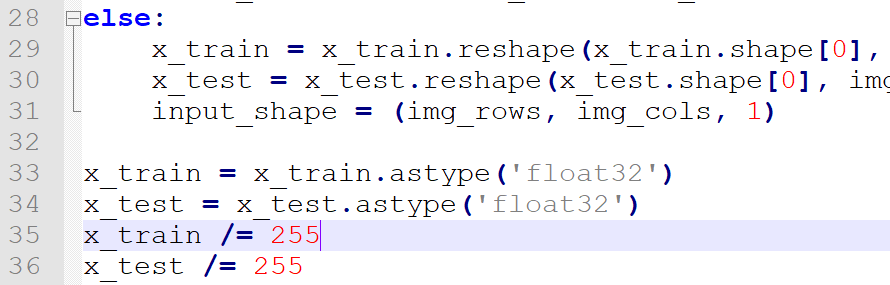
2. 使用的優化器 Optimizer 為何?
> Adadelta
3. 模型總共疊了幾層卷積層?
> 兩層; 分別在line 46, 49
> 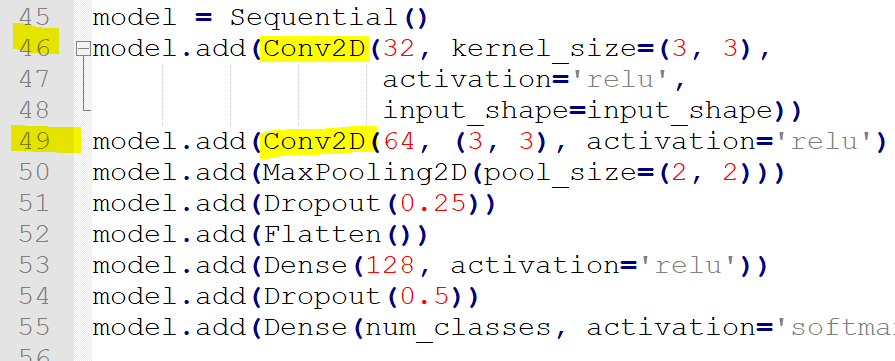
4. 模型的參數量是多少?
> 1st Conv2D 3 * 3 * 32 + 32 = 320 <br>
> 2nd Conv2D 3 * 3 * 64 * 32 + 64 = 18496 <br>
> 1st Dense 12 * 12 * 64 * 128 + 128 = 1179776 <br>
> 2nd Dense 128 * 10 + 10 = 1290 <br>
> `Total: 320 + 18496 + 1179776 + 1290 = 1,199,882 parameters` <br>